In [1]:
import numpy as np
import pandas as pd
from tesser import bic
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import itertools
import glob, os

In [2]:
data_dir ='./Data/results/'

In [3]:
def get_files(data_dir):
    files = [file for file in glob.glob(f"{data_dir}*.csv")]  #returns list of paths to each model data
    return files

In [4]:
def get_k(res, name):
    list_col = list(res.columns)
    list_col.remove('subject')
    list_col.remove('log_like')
    k = len(list_col)
    if 'only'  in name:
        k = k-1
    if 'fixed'  in name:
        k = k-1
    return k

In [5]:
models = {}
files = get_files(data_dir)
for file in files:
    name = file
    name = name.replace(data_dir,"")
    name = name.replace('.csv',"")
    
    results =pd.read_csv(file) # creates DataFrame from csv file
    k = get_k(results, name) # gets number of free parametes of model
    n = 42 # number of trials in induction data

    
    model_bic = bic.get_bic(results, k , n, False) # BIC at group level    
    param_dict = bic.params(results, False)
    avgs = np.array([x for x in param_dict.values()])
    param = [x for x in param_dict.keys()]
    full = np.append(avgs,model_bic)
    models[name] = full
    
param.append( 'BIC')


In [6]:
df_bar =pd.DataFrame(data = models.values(),  columns = param)
df_bar['w_BIC'] = bic.wbic(df_bar.BIC, axis=0)
df_bar.index = models.keys()
df_bar

,gamma,alpha,tau,log_like,BIC,w_BIC
community_only,0.583890,0.490908,5.285527,-27.064583,2818.472338,3.824367e-14
hybrid_community,0.643586,0.670954,1.997400,-25.839584,2999.720161,1.679171e-53
hybrid_community_weighted,0.541442,0.604529,1.148633,-24.518404,3445.748354,2.351275e-150
hybrid_SR_fixed_0.0_weighted,0.771073,0.480253,1.029802,-25.500696,3518.437924,3.863348e-166
hybrid_SR_fixed_0.9,0.584925,0.480150,1.301543,-26.235968,3029.052585,7.171994e-60
hybrid_SR_fixed_0.9_weighted,0.643302,0.512871,0.543492,-24.794981,3466.215040,8.453158e-155
hybrid_SR_free,0.620065,0.490901,1.277954,-26.255165,3302.370921,3.201233e-119
hybrid_SR_free_weighted,0.681027,0.476033,0.333038,-24.816652,3739.716412,3.443108e-214
hybrid_transition_weighted,0.776892,0.574640,0.729846,-25.122768,3490.471289,4.569213e-160
sr_only,0.605664,0.480418,1.596445,-26.229588,2756.682742,1.000000e+00


In [7]:
names = list(df_bar.columns)
names

['gamma', 'alpha', 'tau', 'log_like', 'BIC', 'w_BIC']

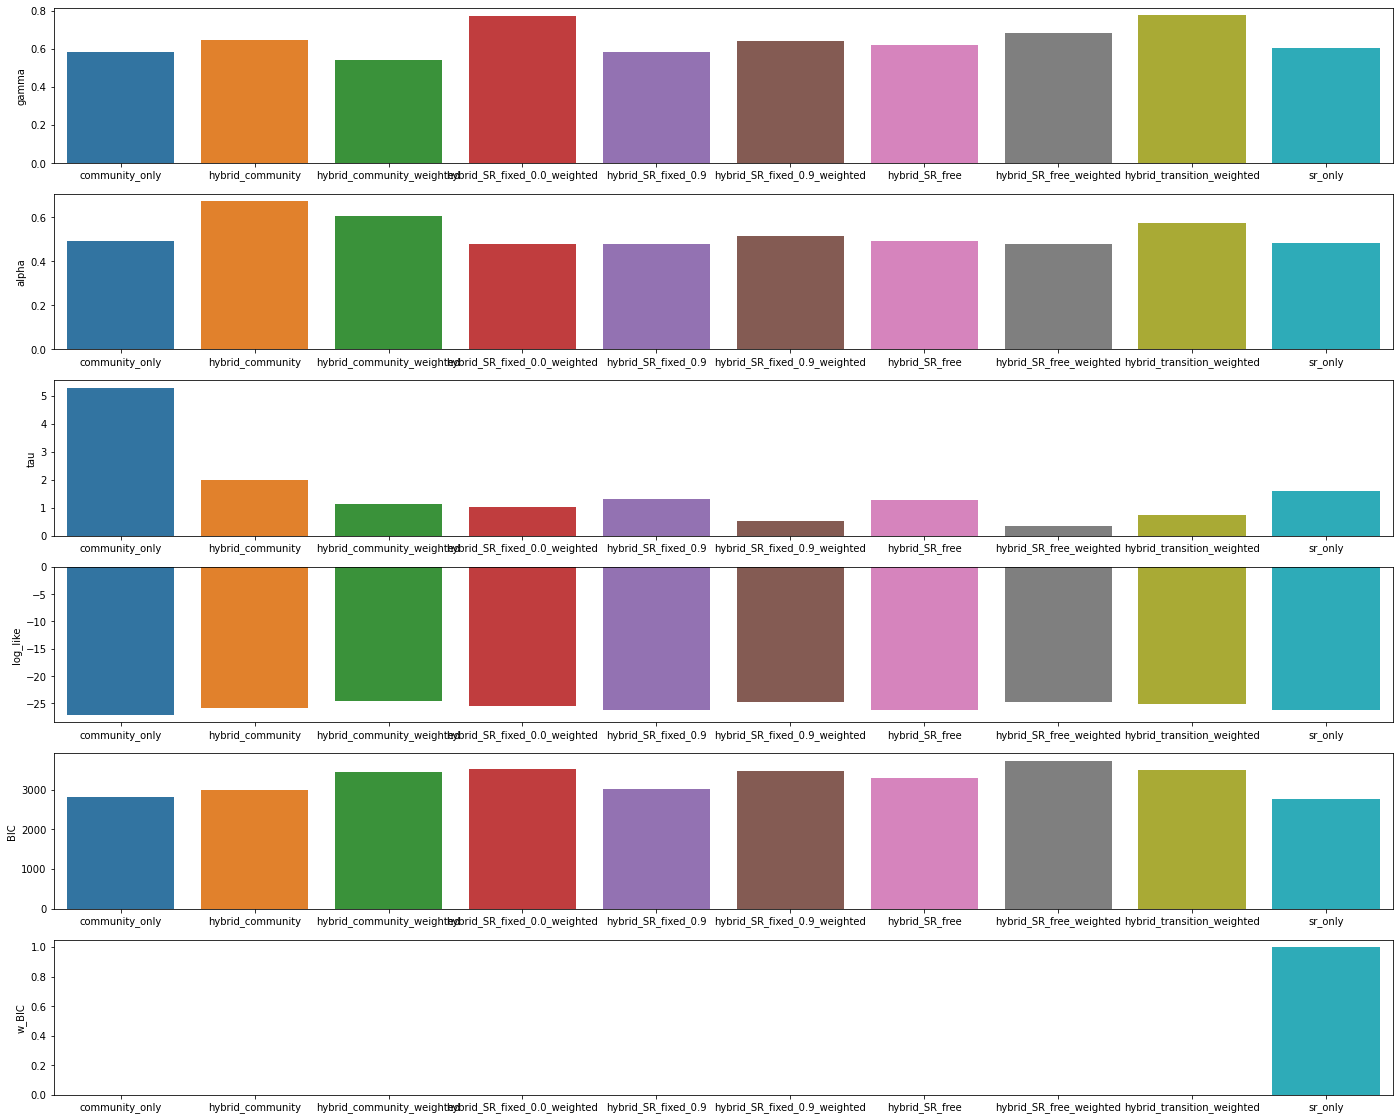

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24,20))

for ax, n in zip(axes.flatten(), names):
    sns.barplot(x=df_bar.index, y=df_bar[n], data=df_bar, ax=ax)


In [9]:
import importlib

In [10]:
importlib.reload(bic)

<module 'tesser.bic' from '/home/work-machine/Preston_Lab/tesser_successor/tesser/bic.py'>

In [120]:
df_bic = pd.DataFrame(results.subject)
df_gamma = df_bic.copy()
df_alpha = df_bic.copy()
df_tau = df_bic.copy()
df_log_like = df_bic.copy()

for file in files:
    name = file
    name = name.replace(data_dir,"")
    name = name.replace('.csv',"")
    results =pd.read_csv(file) # creates DataFrame from csv file

    k = get_k(results, name) # gets number of free parametes of model
    n = 42 # number of trials in induction data

    bic_array = bic.get_bic(results, k , n, subject_BIC= True, array=True) # array of BIC per subjcet
    df_bic[name] = bic_array
    df_gamma[name] = results.gamma
    df_alpha[name] = results.alpha
    df_tau[name] = results.tau
    df_log_like[name] = results.log_like

# mod= pd.concat(df_lists, axis=0, sort=False)
# df_bic =df_bic.set_index('subject')
# df_gamma = df_gamma.set_index('subject')
# df_alpha = df_alpha.set_index('subject')
# df_tau = df_tau.set_index('subject')
# df_log_like = df_log_like.set_index('subject')


In [121]:
# df_bic
# df_bic = df_gamma 
# df_bic = df_alpha 
# df_bic = df_tau
# df_bic = df_log_like

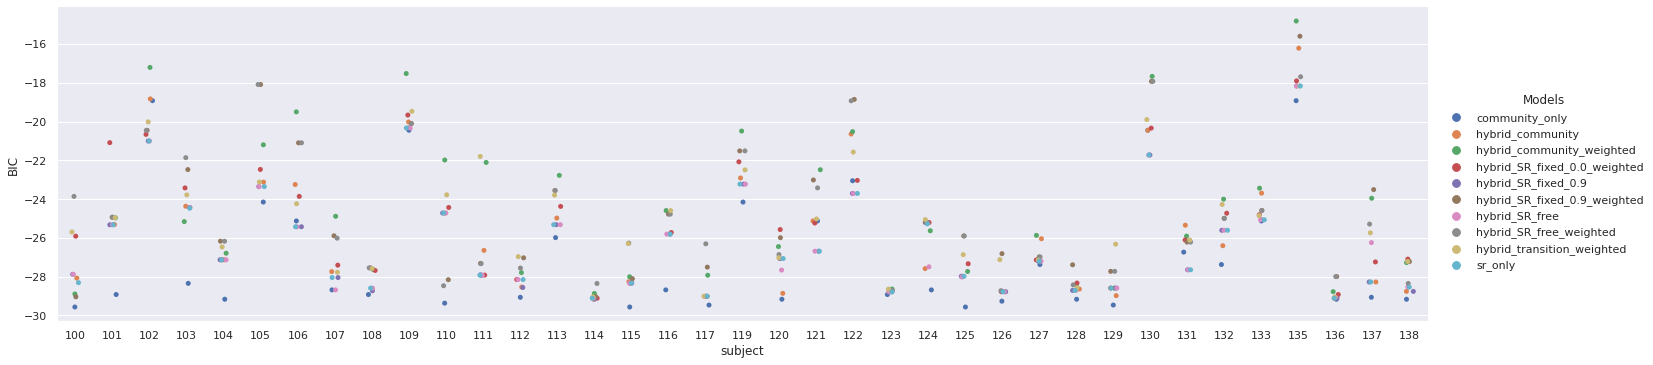

In [114]:
df1 = df_bic.melt('subject', var_name='Models',  value_name='BIC')

sns.catplot(x="subject", y="BIC", hue='Models', data=df1, height=5, aspect=20/5)

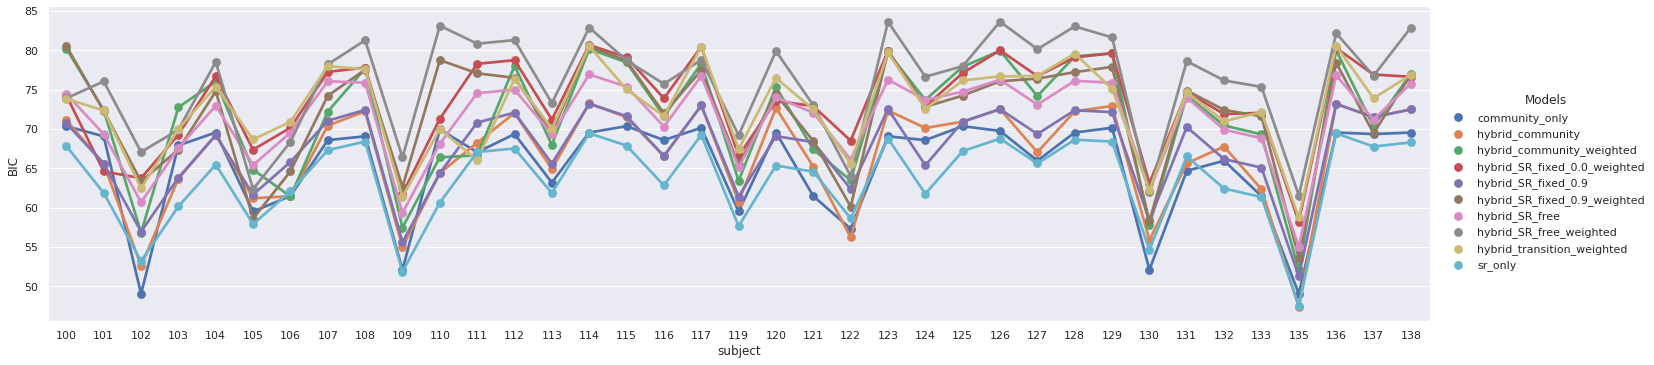

In [91]:
df1 = df_bic.melt('subject', var_name='Models',  value_name='BIC')

sns.catplot(x="subject", y="BIC", hue='Models', data=df1, kind='point', height=5, aspect=20/5)

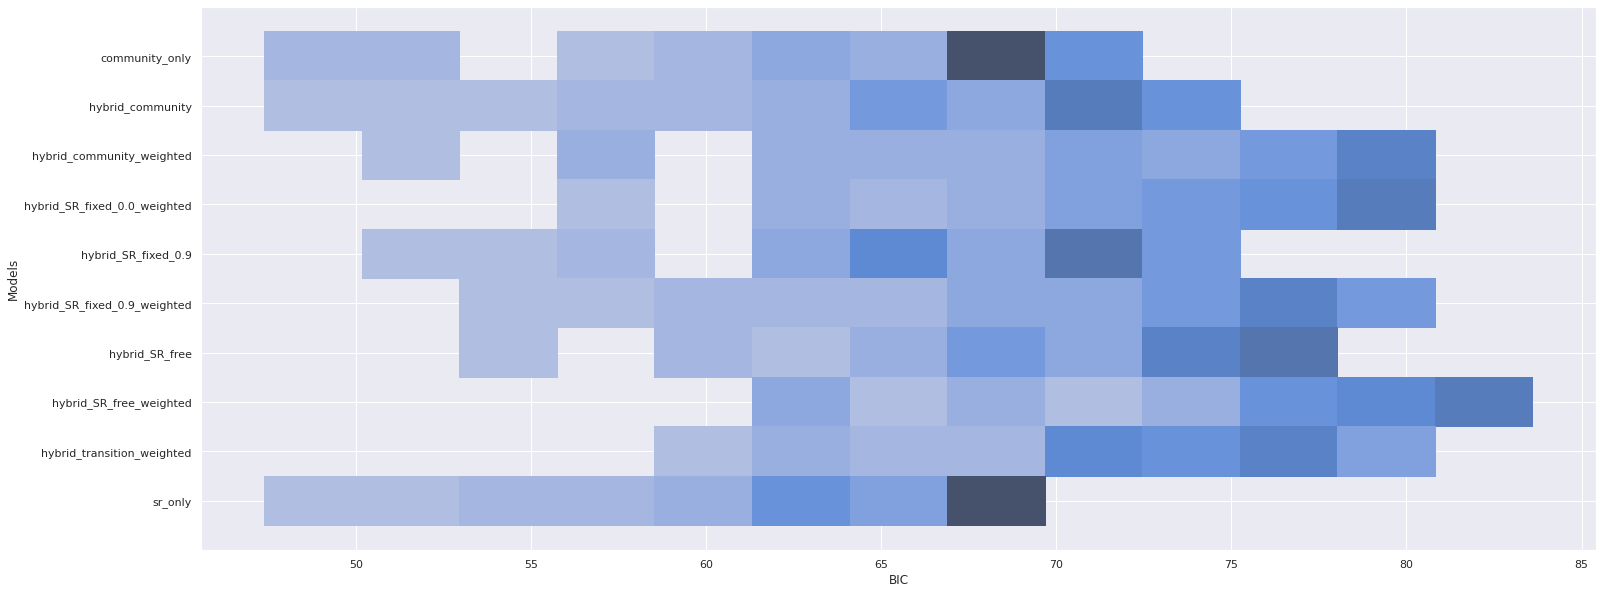

In [84]:
fig, hist = plt.subplots(figsize=(25,10))

hist = sns.histplot(x="BIC", y="Models",data=df1, kde=True, element="step")# hist.set_yticks(rotation=90)


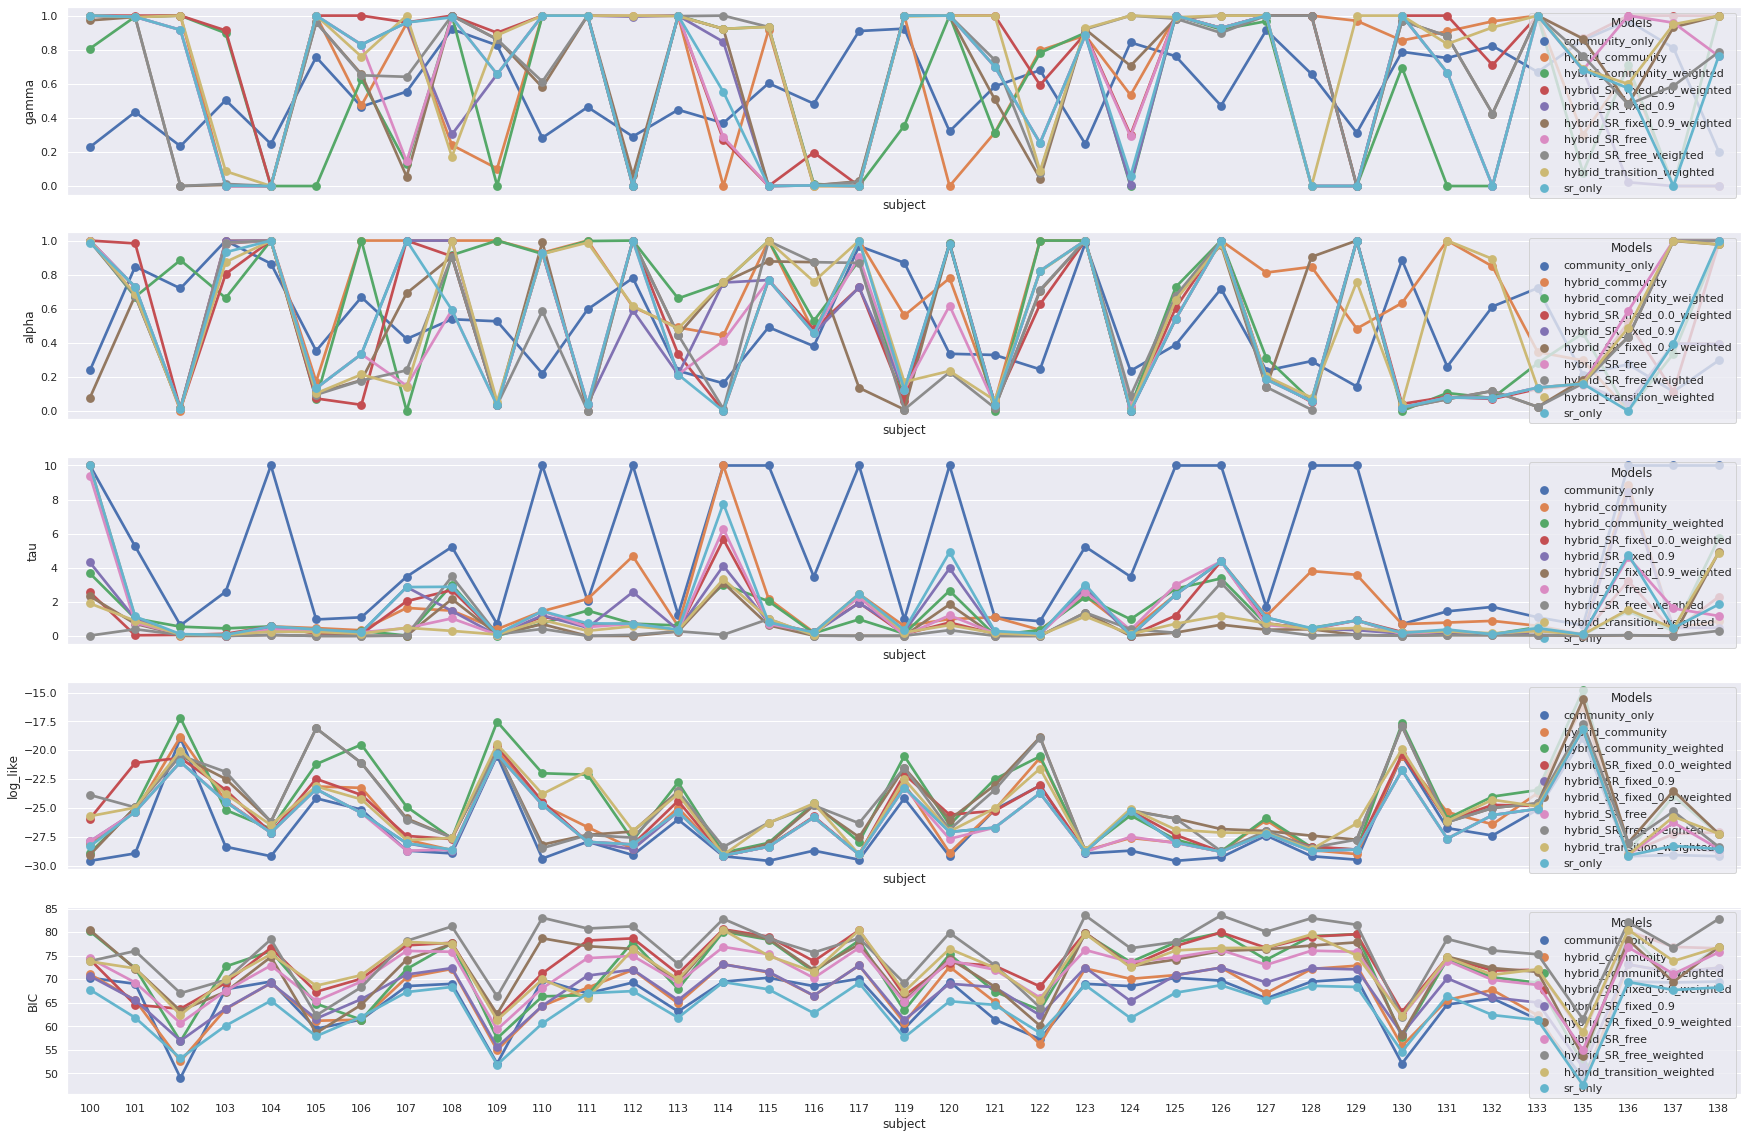

In [127]:
model_names =list(models.keys())
# print(model_names)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(30,20), sharex=True)
plt.gca().set_prop_cycle(None)
data = [df_gamma, df_alpha, df_tau, df_log_like, df_bic]
data_names =['gamma', 'alpha', 'tau', 'log_like', 'BIC']
for ax, p, n in zip(axes.flatten(), data, data_names):
    
    dff = p.melt('subject', var_name='Models',  value_name=n)
#     dff = dff[dff['Models'] == f'{n}']
#     line =sns.regplot(x="subject", y="BIC", data=dff,ax=ax,)
#     line.set_title(f'{n}')
#     line.set_xlabel('')

# plt.show()

    sns.pointplot(x="subject", y=n , hue='Models', data=dff, ax=ax)
